In [2]:
import pandas as pd
from sklearn.decomposition.pca import PCA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Loading

In [5]:
# Load data
train_cd4 = pd.read_csv('../train_data/cd4_gene_expr_train.txt', sep="\t").T
train_cd8 = pd.read_csv('../train_data/cd8_gene_expr_train.txt', sep="\t").T
train_cd19 = pd.read_csv('../train_data/cd19_gene_expr_train.txt', sep="\t").T
train_nasalg = pd.read_csv('../train_data/nasal_gene_expr_train.txt', sep="\t").T
train_nasalm = pd.read_csv('../train_data/nasal_microbiome_train.txt', sep="\t").T
train_label = pd.read_csv('../train_data/severity_score_train.txt', sep="\t")

In [6]:
print(train_cd4.shape)
train_cd4.head()

(55, 5812)


,ENSG00000000419.12,ENSG00000001461.16,ENSG00000001497.16,ENSG00000001629.9,ENSG00000001631.14,ENSG00000002016.16,ENSG00000002549.12,ENSG00000002822.15,ENSG00000002834.17,ENSG00000002919.14,...,ENSG00000280120.1,ENSG00000280137.1,ENSG00000280755.1,ENSG00000280778.1,ENSG00000280981.1,ENSG00000281350.1,ENSG00000281394.1,ENSG00000281485.1,ENSG00000281649.1,ENSG00000282031.1
232,32.899074,78.626424,75.687578,26.117761,35.541990,11.385280,57.767772,83.955958,29.134877,17.487608,...,73.164406,11.914181,8.615822,17.310955,-1.826049,9.975690,46.077593,3.620248,36.019908,148.992463
212,55.222269,66.872878,65.102424,35.965436,52.116183,26.460273,34.035742,66.502476,29.058986,21.697779,...,24.338598,1.447785,40.701210,21.560840,5.248903,11.760343,75.665815,3.620248,40.390817,115.423186
161,49.767500,15.885101,74.080052,27.871494,11.303460,-1.826049,101.161734,18.761268,5.063615,21.002477,...,-0.137071,9.925461,8.589707,-1.826049,10.585107,25.279969,-1.826049,3.620248,54.409160,48.068415
202,20.244496,62.629854,38.496530,38.197900,51.839127,14.076610,9.244676,80.664774,25.004263,19.812070,...,51.262626,41.150975,90.496414,18.830089,12.011402,6.707554,2.858594,12.946118,22.101993,108.965973
169,30.225665,107.121388,66.409847,35.870817,26.967176,16.100600,49.364180,85.247481,18.607485,23.529329,...,72.508169,15.431226,13.444843,31.894399,8.079108,20.141551,84.944680,-1.826049,42.149881,74.451349


In [7]:
print(train_cd8.shape)
train_cd8.head()

(25, 5827)


,ENSG00000000419.12,ENSG00000001461.16,ENSG00000001497.16,ENSG00000001629.9,ENSG00000001631.14,ENSG00000002549.12,ENSG00000002822.15,ENSG00000002834.17,ENSG00000002919.14,ENSG00000003056.7,...,ENSG00000280280.1,ENSG00000280462.1,ENSG00000280498.1,ENSG00000280755.1,ENSG00000280778.1,ENSG00000281103.1,ENSG00000281350.1,ENSG00000281394.1,ENSG00000281649.1,ENSG00000282031.1
126,55.969744,18.439721,14.183961,34.734826,19.833871,4.430849,8.245084,33.408059,10.505921,61.622713,...,9.288328,-4.523997,38.808053,6.235797,132.127230,18.695950,-2.601556,0.170811,25.170134,151.070905
201,48.305262,85.970602,74.125724,34.242775,22.336024,70.817722,20.786454,19.607653,22.971891,376.024440,...,9.288328,-4.523997,-2.474572,68.372251,66.454809,12.593616,3.193075,1.373548,39.141374,194.467939
232,39.131365,44.300463,28.277253,22.564823,14.266558,49.264812,6.716683,7.738354,15.417707,626.772659,...,9.288328,-4.523997,-4.143491,19.868041,42.919179,0.526964,-2.601556,78.844931,37.570134,73.627022
138,50.996508,82.423150,46.444543,51.679765,51.605295,53.744137,48.785826,30.373298,25.091929,242.465355,...,9.288328,81.599012,-4.143491,6.235797,30.785087,12.456941,19.278227,0.170811,52.972639,69.824048
223,43.639959,63.923256,33.146220,59.375093,32.530691,83.430989,163.406793,45.064505,3.832319,65.012571,...,9.288328,-4.523997,102.350199,58.965155,360.567342,27.189824,22.658850,0.170811,22.217230,83.532542


In [8]:
print(train_cd19.shape)
train_cd19.head()

(40, 6026)


,ENSG00000000419.12,ENSG00000000938.12,ENSG00000001461.16,ENSG00000001497.16,ENSG00000001629.9,ENSG00000001631.14,ENSG00000002549.12,ENSG00000002822.15,ENSG00000002919.14,ENSG00000003056.7,...,ENSG00000280498.1,ENSG00000280755.1,ENSG00000280778.1,ENSG00000281003.1,ENSG00000281350.1,ENSG00000281485.1,ENSG00000281649.1,ENSG00000282031.1,ENSG00000282122.1,ENSG00000282651.1
126,46.880081,36.665841,28.316508,64.808530,27.728869,23.325070,82.478980,-0.044859,27.914112,304.470779,...,5.975190,121.252437,22.330209,19.467250,11.409440,480.230145,76.287340,216.457043,0.127366,12.145033
175,30.342231,62.103622,3.032569,60.957138,29.253274,26.572613,211.773701,14.248963,41.534347,447.719553,...,66.067233,51.188273,37.113442,8.378909,-0.761619,1.232827,49.082795,131.281896,457.446041,-0.473963
105,39.856980,43.076633,22.426250,45.702074,14.704561,21.596467,125.331892,18.514680,16.264019,243.135221,...,28.694280,73.326388,15.076118,10.973008,8.976171,39.412163,34.821891,227.140210,164.940259,48.353021
156,55.056814,77.557412,27.636367,46.757501,26.469347,38.443252,120.628592,15.853820,21.766442,207.787168,...,4.870367,52.596171,16.182472,8.451745,16.815426,17.648140,65.395344,212.725458,85.858877,19.099574
143,44.238240,119.289952,29.700904,94.128201,17.878922,22.365000,133.893213,21.268892,26.942028,375.930414,...,29.564798,53.484139,-9.809050,7.744967,52.002263,1.232827,42.536098,243.996422,158.796293,25.331340


In [9]:
print(train_nasalg.shape)
train_nasalg.head()

(64, 6844)


,ENSG00000000003.14,ENSG00000000419.12,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001460.17,ENSG00000001461.16,ENSG00000001497.16,ENSG00000001561.6,...,ENSG00000280637.1,ENSG00000280755.1,ENSG00000280778.1,ENSG00000280832.1,ENSG00000281383.1,ENSG00000281467.1,ENSG00000281649.1,ENSG00000281991.1,ENSG00000282031.1,ENSG00000282432.1
126,-4.837502,3.092790,232.999174,24.005512,12.647634,10.737440,9.732252,8.476824,21.049934,5.685525,...,592.762497,30.762059,-0.083010,18.370025,32.671232,288.675398,13.068108,15.843160,59.263237,5.578127
179,181.248557,58.425299,-3.397187,106.025069,19.757733,79.496297,19.580963,72.289200,31.877476,23.561948,...,-4.837502,7.821762,5.324406,5.069809,9.081486,3.862168,21.269332,21.320514,149.305082,5.578127
161,216.254660,44.180370,4.191857,90.970802,17.259098,27.659944,21.158772,34.462916,22.646915,28.301924,...,-4.837502,22.030726,16.003643,5.870424,4.077457,32.393118,22.165677,23.939152,158.822054,5.578127
201,123.024515,37.223273,34.292355,59.506497,20.238030,32.826074,12.648949,29.323610,12.823434,8.745689,...,178.552249,15.280032,13.350185,16.588397,4.077457,3.862168,9.307777,15.884305,169.138773,5.578127
212,83.580433,39.065227,36.956805,54.976735,17.558111,27.920584,3.104791,25.719911,22.130859,10.563369,...,-4.837502,23.882827,5.737620,7.876840,19.318100,16.559161,15.073033,22.925490,84.881142,5.578127


In [10]:
print(train_nasalm.shape)
train_nasalm.head()

(60, 148)


,"g__Actinomyces,s__","g__Brevibacterium,Other","g__Corynebacterium,s__durum","g__Corynebacterium,s__kroppenstedtii","g__Corynebacterium,s__simulans","g__Corynebacterium,s__variabile","g__Brachybacterium,s__","g__Brachybacterium,s__conglomeratum","g__Dietzia,s__","g__Blastococcus,s__aggregatus",...,"g__Klebsiella,Unknown","g__Moraxella,Unknown","g__Mycobacterium,Unknown","g__Neisseria,Unknown","g__Pseudomonas,Unknown","g__Sphingomonas,Unknown","g__Staphylococcus,Unknown","g__Stenotrophomonas,Unknown","g__Streptococcus,Unknown","g__Veillonella,Unknown"
156,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.006124,0.0,0.0,...,0.003069,0.050816,0.0,0.000000,0.029446,0.000000,0.133087,0.004186,0.140464,0.022087
136,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.019948,0.0,0.000000,0.000000,0.000000,0.434162,0.000000,0.045990,0.000000
169,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.012625,0.000000,0.0,0.000000,0.051222,0.015000,0.048022,0.012381,0.146040,0.000000
221,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.141581,0.0,0.000000,0.014216,0.000000,0.030253,0.006368,0.111560,0.000000
150,0.037868,0.0,0.0,0.0,0.001872,0.003774,0.0,0.000000,0.0,0.0,...,0.010075,0.056961,0.0,0.012376,0.020671,0.001872,0.044245,0.002113,0.147144,0.029289


In [11]:
print(train_label.shape)
train_label.head()

(80, 2)


,severity_score,subject_id
0,4.922664,237
1,1.853421,202
2,6.950658,175
3,8.661423,217
4,8.473521,221


## PCA

In [12]:
sklearn_pca_cd4 = PCA(n_components = 35)
pca_cd4 = sklearn_pca_cd4.fit_transform(train_cd4)

Text(0.5, 1.0, '90.68% of data')

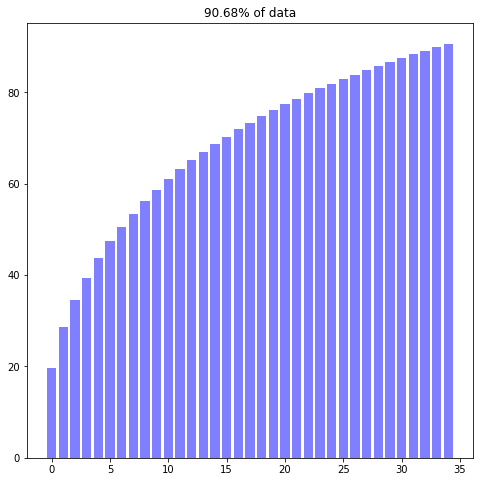

In [13]:
cum_sum = sklearn_pca_cd4.explained_variance_ratio_.cumsum()
sklearn_pca_cd4.explained_variance_ratio_[:10].sum()
cum_sum = cum_sum*100
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(35), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("90.68% of data")

In [14]:
sklearn_pca_cd8 = PCA(n_components = 20)
pca_cd8 = sklearn_pca_cd8.fit_transform(train_cd8)

Text(0.5, 1.0, '95.80% of data')

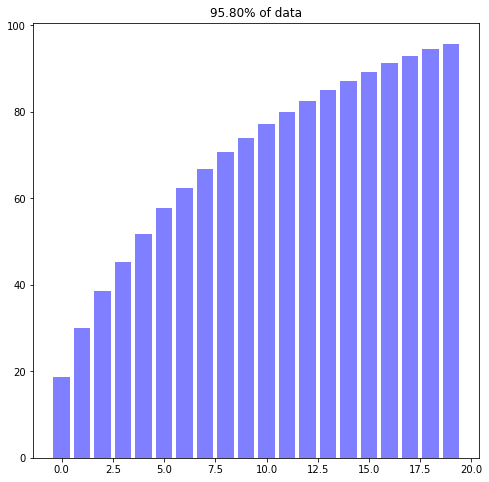

In [15]:
cum_sum_cd8 = sklearn_pca_cd8.explained_variance_ratio_.cumsum()
sklearn_pca_cd8.explained_variance_ratio_[:10].sum()
cum_sum_cd8 = cum_sum_cd8*100
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(20), cum_sum_cd8, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("95.80% of data")

In [16]:
sklearn_pca_cd19 = PCA(n_components = 25)
pca_cd19 = sklearn_pca_cd19.fit_transform(train_cd19)

Text(0.5, 1.0, '90.31% of data')

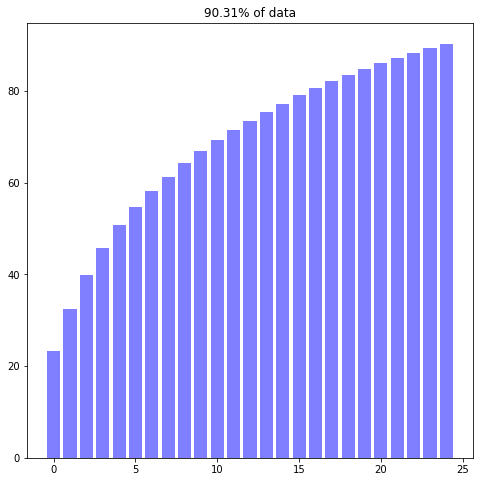

In [17]:
cum_sum_cd19 = sklearn_pca_cd19.explained_variance_ratio_.cumsum()
sklearn_pca_cd19.explained_variance_ratio_[:10].sum()
cum_sum_cd19 = cum_sum_cd19*100
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(25), cum_sum_cd19, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("90.31% of data")

In [15]:
sklearn_pca_ng = PCA(n_components = 35)
pca_ng = sklearn_pca_ng.fit_transform(train_nasalg)

Text(0.5, 1.0, '91.55% of data')

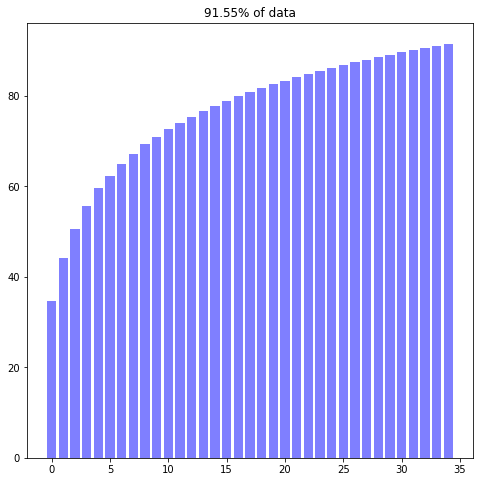

In [16]:
cum_sum_ng = sklearn_pca_ng.explained_variance_ratio_.cumsum()
sklearn_pca_ng.explained_variance_ratio_[:10].sum()
cum_sum_ng = cum_sum_ng*100
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(35), cum_sum_ng, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("91.55% of data")

In [17]:
sklearn_pca_nm = PCA(n_components = 10)
pca_nm = sklearn_pca_nm.fit_transform(train_nasalm)

Text(0.5, 1.0, '95.65% of data')

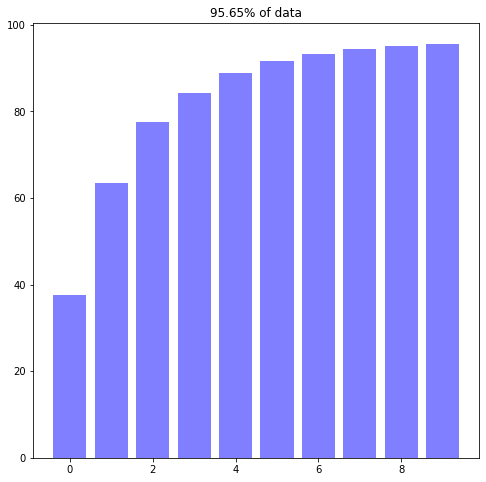

In [18]:
cum_sum_nm = sklearn_pca_nm.explained_variance_ratio_.cumsum()
sklearn_pca_nm.explained_variance_ratio_[:10].sum()
cum_sum_nm = cum_sum_nm*100
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(10), cum_sum_nm, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("95.65% of data")

## Model

In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as XGB
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
i1 = train_cd4.index
i2 = train_label.subject_id
X_train, X_test, y_train, y_test = train_test_split(pca_cd4, train_label[i2.isin(i1)].severity_score, test_size=0.33, random_state=42)

In [21]:
model = RFR(n_estimators = 10, random_state = 0)
i1 = train_cd4.index
i2 = train_label.subject_id
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [28]:
predictions = model.predict(X_test)
errors = (predictions - y_test)**2
print('Mean S Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 10.22 degrees.


## Test data

In [183]:
test_cd4 = pd.read_csv('test_data/cd4_gene_expr_test.txt', sep="\t").T
test_cd8 = pd.read_csv('test_data/cd8_gene_expr_test.txt', sep="\t").T
test_cd19 = pd.read_csv('test_data/cd19_gene_expr_test.txt', sep="\t").T
test_nasalg = pd.read_csv('test_data/nasal_gene_expr_test.txt', sep="\t").T
test_nasalm = pd.read_csv('test_data/nasal_microbiome_test.txt', sep="\t").T

In [ ]:
predictions = RFR.predict(test_cd4)